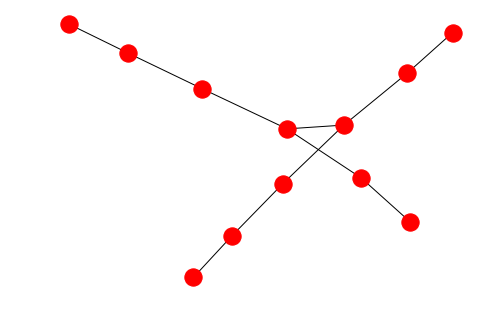

In [9]:
import networkx as nx
g = nx.random_lobster(3,0.9,0.9) #generates a lobster graph http://mathworld.wolfram.com/LobsterGraph.html
nx.draw(g)

In [11]:
m = nx.adjacency_matrix(g)
print(m) ## listed entrywise. Typically, the size of adjacency matrices are too large with lot of zeros (think of facebook) 

  (0, 1)	1
  (0, 4)	1
  (1, 0)	1
  (1, 2)	1
  (1, 6)	1
  (2, 1)	1
  (2, 3)	1
  (2, 8)	1
  (3, 2)	1
  (3, 10)	1
  (4, 0)	1
  (4, 5)	1
  (5, 4)	1
  (6, 1)	1
  (6, 7)	1
  (7, 6)	1
  (8, 2)	1
  (8, 9)	1
  (9, 8)	1
  (10, 3)	1
  (10, 11)	1
  (11, 10)	1


In [12]:
m.todense() #converts into a regular matrix format.

matrix([[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]], dtype=int64)

In [14]:
#creating sparse matrices
import numpy as np
A = np.random.poisson(0.2, (5,15)) * np.random.randint(0, 10, (5, 15))
A

array([[ 0,  9,  0,  0,  0,  0,  0,  7,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  0,  1,  0,  0,  0,  6,  4,  0,  0,  0,  0,  0],
       [ 8,  0,  9,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 12],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  9,  0,  0,  0,  0,  0],
       [ 0,  6,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]])

In [16]:
import numpy as np
rows, cols = np.nonzero(A)
vals = A[rows, cols] 
print("values are", vals)
print("row indices are", rows)
print("column indices are", cols)



values are [ 9  7  3  1  6  4  8  9 12  9  6]
row indices are [0 0 1 1 1 1 2 2 2 3 4]
column indices are [ 1  7  0  4  8  9  0  2 14  9  1]


In [17]:
import scipy
X1 = scipy.sparse.coo_matrix(A) #sparse matrix in COOrdinate format. see also https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.coo_matrix.html
print(X1)

  (0, 1)	9
  (0, 7)	7
  (1, 0)	3
  (1, 4)	1
  (1, 8)	6
  (1, 9)	4
  (2, 0)	8
  (2, 2)	9
  (2, 14)	12
  (3, 9)	9
  (4, 1)	6


Trick with dense and sparse matrix conversion: When indices are repeated in a sparse matrix, they are summed.

In [95]:
rows = np.repeat([0,1], 4)
cols = np.repeat([0,1], 4)
vals = np.arange(8)

In [96]:
rows

array([0, 0, 0, 0, 1, 1, 1, 1])

In [97]:
cols

array([0, 0, 0, 0, 1, 1, 1, 1])

In [98]:
vals

array([0, 1, 2, 3, 4, 5, 6, 7])

In [100]:
X2 = scipy.sparse.coo_matrix((vals, (rows, cols)))
X2

<2x2 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in COOrdinate format>

In [101]:
X2.todense()

matrix([[ 6,  0],
        [ 0, 22]])

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

iris = datasets.load_iris() # load the so-called iris data set https://en.wikipedia.org/wiki/Iris_flower_data_set
knn = KNeighborsClassifier()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.5, random_state=42) #split the dataset randomly into train set and test set.
pred = knn.fit(X_train, y_train).predict(X_test) #use a classifier (K-nearest neighbour) to predict the labels of the test set after learing from the training set. 

In [2]:
print("Predictions are", pred)
print("true values are", y_test)

Predictions are [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 1 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 1 2 1 2 1 2 1 0 2 1 0 0 0 1 1 0 0 0 1 0 1 2 0 1 2 0 1 2
 1]
true values are [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 2 2 1 2 1 2 1 0 2 1 0 0 0 1 2 0 0 0 1 0 1 2 0 1 2 0 2 2
 1]


In [6]:
import scipy
import numpy as np

In [7]:
CM = scipy.sparse.coo_matrix((np.ones(len(pred)).astype('int'), (pred, y_test))) #confusion matrix
CM.todense()




matrix([[29,  0,  0],
        [ 0, 23,  4],
        [ 0,  0, 19]])

We now look at linear system solving and SVD computation.

In [18]:
#solving system of linear equations
A = np.random.random((3,3))
print("A =", A)
b = np.random.random((3,1))
print("b =", b)

A = [[0.59044987 0.813295   0.7101663 ]
 [0.9946058  0.91598355 0.15822149]
 [0.27242227 0.08414749 0.84077864]]
b = [[0.80867234]
 [0.25749905]
 [0.33281101]]


In [19]:
np.linalg.solve(A, b)

array([[-0.87879026],
       [ 1.13744294],
       [ 0.56673666]])

In [110]:
#commands for computing eigenvalue decomposition and singular value decomposition
from scipy import linalg

A = np.array([[1, 2], [3, 4]]) #create a matrix

S, V = linalg.eig(A) # compute eigenvalues and eigenvectors.
print(S)
print('   ')
print(V)

[-0.37228132+0.j  5.37228132+0.j]
   
[[-0.82456484 -0.41597356]
 [ 0.56576746 -0.90937671]]


In [111]:
A = np.array([[1,2],[3,4], [5,6]])
U, S, V = linalg.svd(A) #SVD
print(S)
print('   ')
print(U)
print('   ')
print(V)

[9.52551809 0.51430058]
   
[[-0.2298477   0.88346102  0.40824829]
 [-0.52474482  0.24078249 -0.81649658]
 [-0.81964194 -0.40189603  0.40824829]]
   
[[-0.61962948 -0.78489445]
 [-0.78489445  0.61962948]]


In the above, we saw the commands for solving linear systems, computing eigenvalue and singular value decompositions. There is a "lot" going on inside each command, when it is used. Take a look at the help manual for those commands to get familiar with different options of the command. 

## Power Method

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt



In [2]:
def power_iteration(A,v0,niter=50):
    v = v0
    vv = [v0]
    ll = [np.dot(v0,np.dot(A,v0))]
    for k in range(niter):
        w = np.dot(A,v)
        v = w/np.linalg.norm(w)
        lamda = np.dot(v,np.dot(A,v))  # v^T A v
        vv.append(v)
        ll.append(lamda)
    return ll, vv

In [3]:
A = np.array([[2.,1,1],[1,3,1],[1,1,4]])
print(A)
print(np.linalg.eigvals(A))
lam =(np.linalg.eigvals(A)[0])

[[2. 1. 1.]
 [1. 3. 1.]
 [1. 1. 4.]]
[5.21431974 1.32486913 2.46081113]


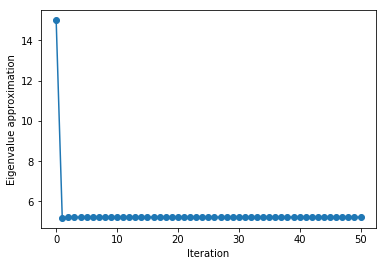

In [4]:
ll, vv = power_iteration(A,np.ones(3))
plt.plot(range(len(ll)),ll,'-o')
plt.ylabel('Top Eigenvalue')
plt.xlabel('Iteration');

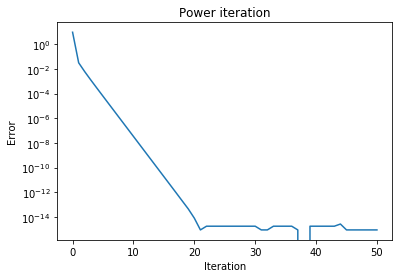

In [5]:
plt.semilogy(np.abs(ll-lam))
plt.ylabel('Error'); plt.title('Power iteration')
plt.xlabel('Iteration');

In [11]:
print(vv[10]) ##print the [.] iteration of the top eigenvector computed throught power method.

[0.39713873 0.52073975 0.75571883]


In [7]:
V,L = np.linalg.eig(A)

In [8]:
L ## printing out the Eigenvector matrix computed via python command

array([[ 0.39711255,  0.88765034, -0.23319198],
       [ 0.52065737, -0.42713229, -0.73923874],
       [ 0.75578934, -0.17214786,  0.63178128]])